In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/g6/4flmdffs7l35hmmt1wkgrfcm0000gr/T/ipykernel_78201/960205004.py:20: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.stripplot(x='stage', y='percentage', hue='location', data=data,


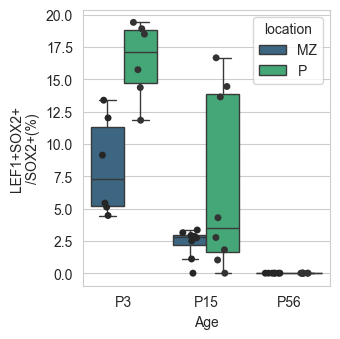

In [5]:
#load /Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim\ 1/thea_images_and_quant/percentage_quantifications_lef1_sox2_over_sox2.xlsx
data = pd.read_excel("/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/thea_images_and_quant/percentage_quantifications_lef1_sox2_over_sox2.xlsx",header=None)
#rename cols 0,1,2 to stage, location, percentage
data.columns = ['stage', 'location', 'percentage',"sample"]
#in percentage turn , to . and then float
data['percentage'] = data['percentage'].str.replace(',', '.').astype(float) 

#change nan to 0
data['percentage'] = data['percentage'].fillna(0)


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Plot the boxplot without outliers
sns.boxplot(x='stage', y='percentage', hue='location', data=data, 
            palette='viridis', ax=ax, showfliers=False)

# Plot the stripplot on top to show all observations
sns.stripplot(x='stage', y='percentage', hue='location', data=data, 
              jitter=0.2, dodge=True, color=".2", ax=ax, legend=False)

#x label to be LEF1+SOX2+\n/SOX2+(%)
ax.set_ylabel('LEF1+SOX2+\n/SOX2+(%)')
ax.set_xlabel('Age')

plt.title('')
plt.tight_layout()


plt.savefig("/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/lef1_sox2_quantification.svg")
plt.savefig("/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/lef1_sox2_quantification.png")

plt.show()


In [6]:
data.head()

,stage,location,percentage,sample
0,P3,MZ,12.01,1
1,P3,MZ,5.42,2
2,P3,MZ,13.38,3
3,P3,MZ,4.46,4
4,P3,MZ,5.11,5


In [9]:
p3_p = data[(data['stage'] == 'P3') & (data['location'] == 'P')]
p3_mz = data[(data['stage'] == 'P3') & (data['location'] == 'MZ')]
#paired t-test between p3_p and p3_mz
from scipy.stats import ttest_rel
print(ttest_rel(p3_p['percentage'], p3_mz['percentage']))


p15_p = data[(data['stage'] == 'P15') & (data['location'] == 'P')]
p15_mz = data[(data['stage'] == 'P15') & (data['location'] == 'MZ')]
#paired t-test between p15_p and p15_mz
from scipy.stats import ttest_rel
print(ttest_rel(p15_p['percentage'], p15_mz['percentage']))

TtestResult(statistic=5.443882951760406, pvalue=0.002839931670669092, df=5)
TtestResult(statistic=1.8192905746333423, pvalue=0.11168457351112057, df=7)


In [10]:
#compare p3_p to p56_p
p56_p = data[(data['stage'] == 'P56') & (data['location'] == 'P')]
from scipy.stats import ttest_ind
print(ttest_ind(p3_p['percentage'], p56_p['percentage']))


#compare p3_mz to p56_mz
p56_mz = data[(data['stage'] == 'P56') & (data['location'] == 'MZ')]
from scipy.stats import ttest_ind
print(ttest_ind(p3_mz['percentage'], p56_mz['percentage']))

TtestResult(statistic=14.601725735313828, pvalue=1.512357017960752e-08, df=11.0)
TtestResult(statistic=5.739329264700821, pvalue=0.00013040235787188954, df=11.0)
